<a href="https://colab.research.google.com/github/PhDNoe/Algoritmos/blob/main/clustering/K_Means_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

# K-Means


### **Definición de la Clase**

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)


In [1]:
import numpy as np
import matplotlib.pyplot as plt

class KMeans:
    def __init__(self, n_clusters=2, max_iter=300):
        self.n_clusters = n_clusters
        self.max_iter = max_iter

    def fit(self, X):
        self.centroids = {}
        # Initialize the centroids randomly
        for i in range(self.n_clusters):
            self.centroids[i] = X[i]
        for i in range(self.max_iter):
            self.clusters = {}
            for j in range(self.n_clusters):
                self.clusters[j] = []
            # Assign each data point to the closest centroid
            for x in X:
                distances = [np.linalg.norm(x - self.centroids[c]) for c in self.centroids]
                cluster = distances.index(min(distances))
                self.clusters[cluster].append(x)
            # Update the centroids
            prev_centroids = dict(self.centroids)
            for cluster in self.clusters:
                self.centroids[cluster] = np.average(self.clusters[cluster], axis=0)
            # Check for convergence
            is_converged = True
            for c in self.centroids:
                if not np.array_equal(self.centroids[c], prev_centroids[c]):
                    is_converged = False
                    break
            if is_converged:
                break

    def predict(self, X):
        distances = [np.linalg.norm(X - self.centroids[c]) for c in self.centroids]
        cluster = distances.index(min(distances))
        return cluster


![divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

### Probamos el algoritmo con un conjunto básico de datos

![divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

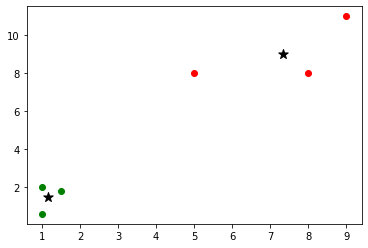

In [2]:
X = np.array([[1, 2], [1.5, 1.8], [5, 8], [8, 8], [1, 0.6], [9, 11]])
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)

colors = ["g", "r"]

for cluster in kmeans.clusters:
    color = colors[cluster]
    for x in kmeans.clusters[cluster]:
        plt.scatter(x[0], x[1], color=color)

for c in kmeans.centroids:
    plt.scatter(kmeans.centroids[c][0], kmeans.centroids[c][1], color="k", marker="*", s=100)

plt.show()


![divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)
### Ahora probamos con el Iris dataset

![divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

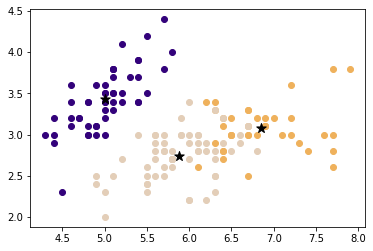

In [4]:
from sklearn import datasets
from random import randint

iris = datasets.load_iris()
X_iris = iris.data
y_iris = iris.target
labels = iris.feature_names


# El dataset iris tiene 3 features
nro_clusters = 3

# Generamos un color para cada cluster
colors = []

for i in range(nro_clusters):
    colors.append('#%06X' % randint(0, 0xFFFFFF))


kmeans = KMeans(n_clusters=nro_clusters)
kmeans.fit(X_iris)




for cluster in kmeans.clusters:
    color = colors[cluster]
    for x in kmeans.clusters[cluster]:
        plt.scatter(x[0], x[1], color=color)

for c in kmeans.centroids:
    plt.scatter(kmeans.centroids[c][0], kmeans.centroids[c][1], color="k", marker="*", s=100)

plt.show()
